In [1]:
import uproot
import numpy as np

import matplotlib.pyplot as plt

In [2]:
cols = ['#CCCCCC', '#07A9FF', '#1A2A5B', '#FF9E21', '#149A9A', 'indianred', '#66283A', '#8A1859', '#BFC2C7',
        '#FFB0A8', '#B580CA', '#203769', '#909090', '#909090', '#83C369', '#FDED95', '#85F7C2', '#105D20',
        '#E77D4D', '#9D0008', '#EDDAB7', '#DCDCDC', '#DCDCDC', '#393939']

## SM 2nbb distribution

In [3]:
sm_2nbb_dist = np.loadtxt('/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/L200_Spectral_Effects_Fitting/dist/standard_model/SM_2vbb_76Ge_sums.txt', usecols=(2), unpack=True)
sm_2nbb_dist = np.insert(sm_2nbb_dist, 0, 0, axis=0)

In [4]:
bins = np.arange(0, len(sm_2nbb_dist), 1)

## Majoron emission

In [5]:
data_path = '/Users/romoluque_c/LEGEND/2nbb_distortions/data_bckg_model/'

majoRL_dist0 = np.loadtxt(data_path + '/majorons/TotalEnergyDist_RL_76Ge.txt', usecols=(1), unpack=True)
majoRR_dist0 = np.loadtxt(data_path + '/majorons/TotalEnergyDist_RR_76Ge.txt', usecols=(1), unpack=True)

majoRL_dist0 = np.insert(majoRL_dist0, 0, 0, axis=0)
majoRR_dist0 = np.insert(majoRR_dist0, 0, 0, axis=0)

majoRL_dist = majoRL_dist0 / np.sum(majoRL_dist0)
majoRR_dist = majoRR_dist0 / np.sum(majoRR_dist0)

In [6]:
def distribution_exotic_2nbb(x, n):
    ## x input must be given in keV
    Qbb = 2039
    me  =  511
    x0  = Qbb / me
    x   =   x / me
    y   = (pow(x,4) + 10*pow(x,3) + 40*pow(x,2) + 60*x + 30) * x * pow((x0-x), n)
    y   = y / np.sum(y) # Normalize to area = 1
    return y

majo_n1_dist = distribution_exotic_2nbb(bins, 1)
majo_n2_dist = distribution_exotic_2nbb(bins, 2)
majo_n3_dist = distribution_exotic_2nbb(bins, 3)
majo_n7_dist = distribution_exotic_2nbb(bins, 7)

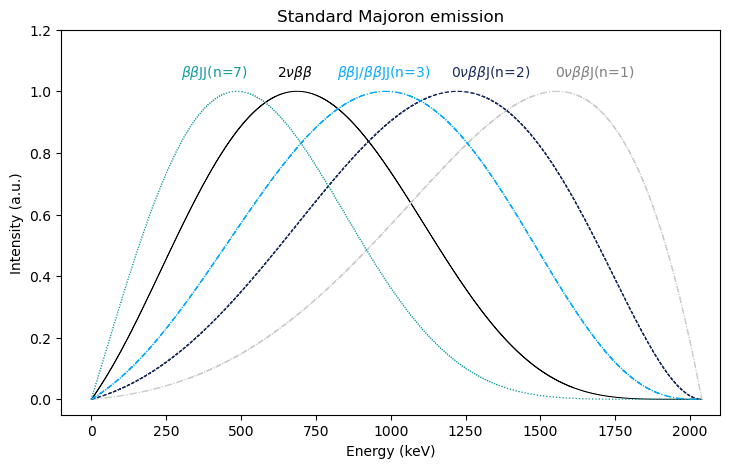

In [7]:
# fig, ax = plt.subplots(figsize=(8.5, 4))
# ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k'    , lw=0.7, ls='-',  label=r'SM 2$\nu\beta\beta$')
# ax.step(bins, majo_n1_dist/np.max(majo_n1_dist), c=cols[0], lw=0.9, ls='-.', label=r'$\beta\beta$J (n=1)')
# ax.step(bins, majo_n2_dist/np.max(majo_n2_dist), c=cols[2], lw=0.9, ls='--', label=r'$\beta\beta$J (n=2)')
# ax.step(bins, majo_n3_dist/np.max(majo_n3_dist), c=cols[1], lw=0.9, ls='-.', label=r'$\beta\beta$J/$\beta\beta$JJ (n=3)')
# ax.step(bins, majo_n7_dist/np.max(majo_n7_dist), c=cols[4], lw=0.9, ls=':',  label=r'$\beta\beta$JJ (n=7)')
# ax.set_xlim(-100, 2600)
# ax.set_xlabel('Energy (keV)')
# ax.set_ylabel('Intensity (a.u.)')
# ax.set_title('Standard Majoron emission')
# ax.grid()
# ax.legend();

fig, ax = plt.subplots(figsize=(8.5, 5))
ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k'    , lw=0.7, ls='-',  label=r'SM 2$\nu\beta\beta$')
ax.step(bins, majo_n1_dist/np.max(majo_n1_dist), c=cols[0], lw=0.9, ls='-.', label=r'$\beta\beta$J (n=1)')
ax.step(bins, majo_n2_dist/np.max(majo_n2_dist), c=cols[2], lw=0.9, ls='--', label=r'$\beta\beta$J (n=2)')
ax.step(bins, majo_n3_dist/np.max(majo_n3_dist), c=cols[1], lw=0.9, ls='-.', label=r'$\beta\beta$J/$\beta\beta$JJ (n=3)')
ax.step(bins, majo_n7_dist/np.max(majo_n7_dist), c=cols[4], lw=0.9, ls=':',  label=r'$\beta\beta$JJ (n=7)')

ax.text( 300, 1.05, r'$\beta\beta$JJ(n=7)',               color=cols[4])
ax.text( 620, 1.05, r'2$\nu\beta\beta$',                  color='k')
ax.text( 820, 1.05, r'$\beta\beta$J/$\beta\beta$JJ(n=3)', color=cols[1])
ax.text(1200, 1.05, r'0$\nu\beta\beta$J(n=2)',            color=cols[2])
ax.text(1550, 1.05, r'0$\nu\beta\beta$J(n=1)',            color='grey')

ax.set_xlim(-100, 2600)
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title('Standard Majoron emission')
ax.set_xlim(-100, 2100)
ax.set_ylim(-0.05, 1.2)
#fig.savefig('./images/standard_majoron_spectra.pdf', bbox_inches = 'tight')
plt.show()

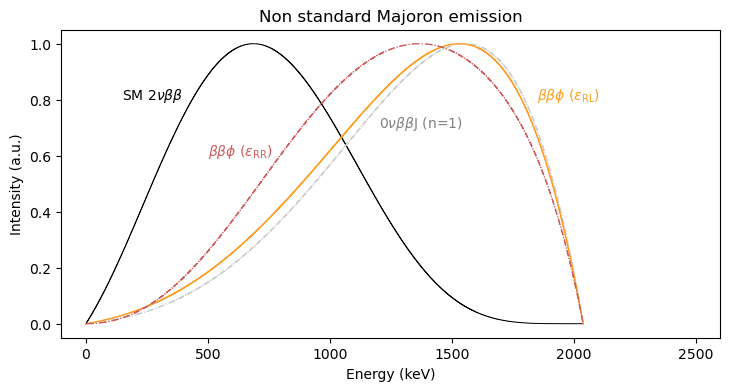

In [8]:
# fig, ax = plt.subplots(figsize=(8.5, 4))
# ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k'    , lw=0.7, ls='-',  label=r'SM 2$\nu\beta\beta$')
# ax.step(bins, majo_n1_dist/np.max(majo_n1_dist), c=cols[0], lw=0.9, ls='-.', label=r'$\beta\beta$J (n=1)')
# ax.step(bins, majoRL_dist /np.max(majoRL_dist ), c=cols[3], lw=0.9, ls='-',  label=r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RL}}$)')
# ax.step(bins, majoRR_dist /np.max(majoRR_dist ), c=cols[5], lw=0.9, ls='-.', label=r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RR}}$)')
# ax.set_xlim(-100, 2600)
# ax.set_xlabel('Energy (keV)')
# ax.set_ylabel('Intensity (a.u.)')
# ax.set_title('Non standard Majoron emission')
# #ax.grid()
# ax.legend();

fig, ax = plt.subplots(figsize=(8.5, 4))
ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k'    , lw=0.7, ls='-',  label=r'SM 2$\nu\beta\beta$')
ax.step(bins, majo_n1_dist/np.max(majo_n1_dist), c=cols[0], lw=0.9, ls='-.', label=r'$\beta\beta$J (n=1)')
ax.step(bins, majoRL_dist /np.max(majoRL_dist ), c=cols[3], lw=0.9, ls='-',  label=r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RL}}$)')
ax.step(bins, majoRR_dist /np.max(majoRR_dist ), c=cols[5], lw=0.9, ls='-.', label=r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RR}}$)')

ax.text(150, 0.8, r'SM 2$\nu\beta\beta$',                          color='k')
ax.text(1850, 0.8, r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RL}}$)', color=cols[3])
ax.text(1200, 0.7, r'0$\nu\beta\beta$J (n=1)',                     color='grey')
ax.text(500, 0.6, r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RR}}$)',  color=cols[5])
ax.set_xlim(-100, 2600)
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title('Non standard Majoron emission')
fig.savefig('./images/non-standard_majoron_spectra.pdf', bbox_inches='tight')
plt.show()

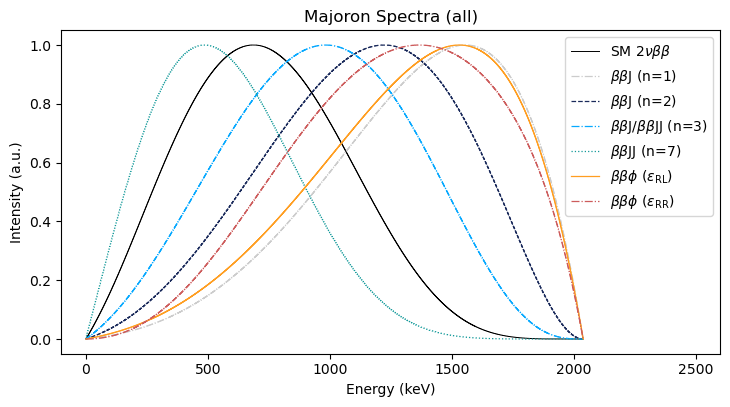

In [9]:
fig, ax = plt.subplots(figsize=(8.5, 4.2))
ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k'    , lw=0.7, ls='-',  label=r'SM 2$\nu\beta\beta$')
ax.step(bins, majo_n1_dist/np.max(majo_n1_dist), c=cols[0], lw=0.9, ls='-.', label=r'$\beta\beta$J (n=1)')
ax.step(bins, majo_n2_dist/np.max(majo_n2_dist), c=cols[2], lw=0.9, ls='--', label=r'$\beta\beta$J (n=2)')
ax.step(bins, majo_n3_dist/np.max(majo_n3_dist), c=cols[1], lw=0.9, ls='-.', label=r'$\beta\beta$J/$\beta\beta$JJ (n=3)')
ax.step(bins, majo_n7_dist/np.max(majo_n7_dist), c=cols[4], lw=0.9, ls=':',  label=r'$\beta\beta$JJ (n=7)')
ax.step(bins, majoRL_dist /np.max(majoRL_dist ), c=cols[3], lw=0.9, ls='-',  label=r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RL}}$)')
ax.step(bins, majoRR_dist /np.max(majoRR_dist ), c=cols[5], lw=0.9, ls='-.', label=r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RR}}$)')
ax.set_xlim(-100, 2600)
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title('Majoron Spectra (all)')
ax.legend()
#fig.savefig('./images/all_majoron_spectra.pdf', bbox_inches='tight')

## Light exotic fermions (sterile right-handed neutrinos)

In [10]:
basepath = '/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/spectral_dist/'

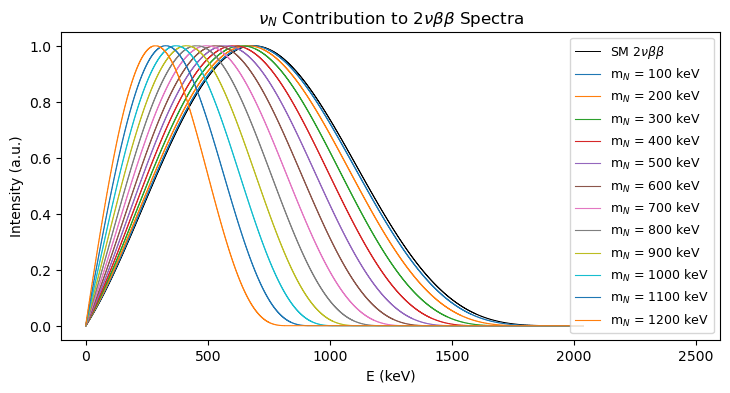

In [11]:
sterile_masses_keV = np.arange(100, 1300, 100)
lef_signal_dist    = []

for idx, sterile_mass_keV in enumerate(sterile_masses_keV):
    sdist = np.loadtxt((basepath + 'dist/sterile/76Ge_2vbb_mnu_{}_0_keV/76Ge_sums.txt'.format(sterile_mass_keV)), usecols=(2))
    sdist = np.insert(sdist, 0, 0, axis=0)
    sdist = sdist / np.sum(sdist)
    lef_signal_dist.append(sdist)

fig, ax = plt.subplots(figsize=(8.5, 4))
ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k', lw=0.7, ls='-', label=r'SM 2$\nu\beta\beta$')

for sdist, sterile_mass_keV in zip(lef_signal_dist, sterile_masses_keV):
    ax.step(bins, sdist/np.max(sdist), label=r'm$_{N}$ = ' + str(sterile_mass_keV) + ' keV', lw=0.8)

ax.set_xlim(-100, 2600)
ax.set_xlabel('E (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title(r'$\nu_N$ Contribution to 2$\nu\beta\beta$ Spectra')
ax.legend(fontsize=9)
#fig.savefig('./images/sterile_rh_neutrinos_spectra.pdf', bbox_inches='tight')
plt.show()

## Right Handed Currents Spectra

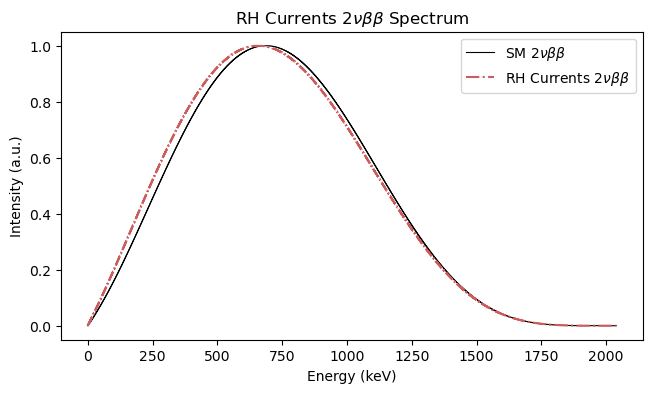

In [12]:
rh_curr_dist = np.loadtxt(basepath+'dist/rh_curr/Ge-RHC-Etot-distro-1kev-reinterpolated.dat', usecols=(1), unpack=True)
rh_curr_dist = np.insert(rh_curr_dist, 0, 0, axis=0)
rh_curr_dist = rh_curr_dist / np.sum(rh_curr_dist)

fig, ax = plt.subplots(figsize=(7.5, 4))
ax.step(bins, sm_2nbb_dist / np.max(sm_2nbb_dist), c='k',     lw=0.8,  label=r'SM 2$\nu\beta\beta$')
ax.step(bins, rh_curr_dist / np.max(rh_curr_dist), c=cols[5], ls='-.', label=r'RH Currents 2$\nu\beta\beta$', )
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title(r'RH Currents 2$\nu\beta\beta$ Spectrum')
ax.legend()
#fig.savefig('./images/right_handed_current_spectrum.pdf', bbox_inches='tight')
plt.show()

## Lorentz violation spectrum:

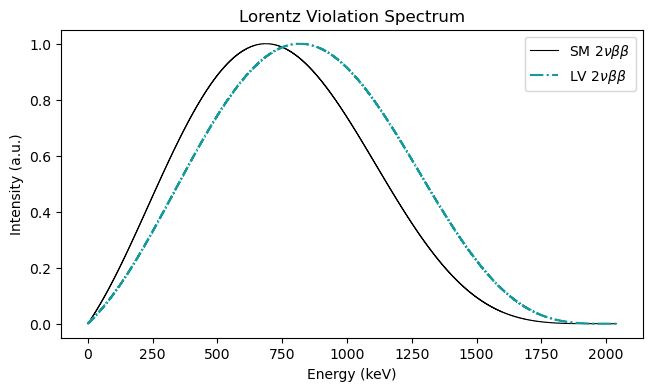

In [13]:
lv_dist = np.loadtxt(basepath + 'dist/lorentz/LV_76Ge_spectra.dat', usecols=(2), unpack=True)
lv_dist = np.insert(lv_dist, 0, 0, axis=0)
lv_dist = lv_dist / np.sum(lv_dist)

fig, ax = plt.subplots(figsize=(7.5, 4))
ax.step(bins, sm_2nbb_dist / np.max(sm_2nbb_dist), c='k',     lw=0.8,  label=r'SM 2$\nu\beta\beta$')
ax.step(bins, lv_dist      / np.max(lv_dist),      c=cols[4], ls='-.', label=r'LV 2$\nu\beta\beta$')
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title('Lorentz Violation Spectrum')
ax.legend()
fig.savefig('./images/lorentz_violation_spectrum.pdf', bbox_inches='tight')
plt.show()

## Double exotic fermion decay

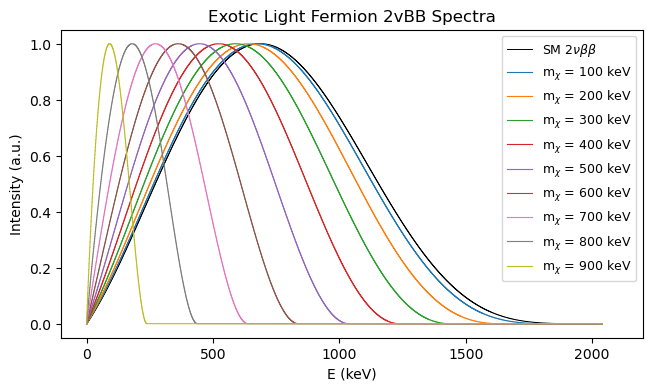

In [14]:
light_fermion_masses_keV = np.arange(100, 1000, 100)
def_signal_dist          = []

for idx, fermion_mass_keV in enumerate(light_fermion_masses_keV):
    sdist = np.loadtxt((basepath + 'dist/double_ferm/76Ge_2vbb_mnu_{}_{}_keV/76Ge_sums.txt'.format(fermion_mass_keV, fermion_mass_keV)), usecols=(2))
    sdist = np.insert(sdist, 0, 0, axis=0)
    sdist = sdist / np.sum(sdist)
    def_signal_dist.append(sdist)
    
fig, ax = plt.subplots(figsize=(7.5, 4))
ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k', lw=0.7, ls='-', label=r'SM 2$\nu\beta\beta$')

for sdist, fermion_mass_keV in zip(def_signal_dist, light_fermion_masses_keV):
    ax.step(bins, sdist/np.max(sdist), label=r'm$_{\chi}$ = ' + str(fermion_mass_keV) + ' keV', lw=0.8)

ax.set_xlim(-100, 2200)
ax.set_xlabel('E (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title('Exotic Light Fermion 2vBB Spectra')
ax.legend(fontsize=9)
#fig.savefig('./images/double_exotic_fermion_decay_spectra.pdf', bbox_inches='tight')
plt.show()

## All contributions together:

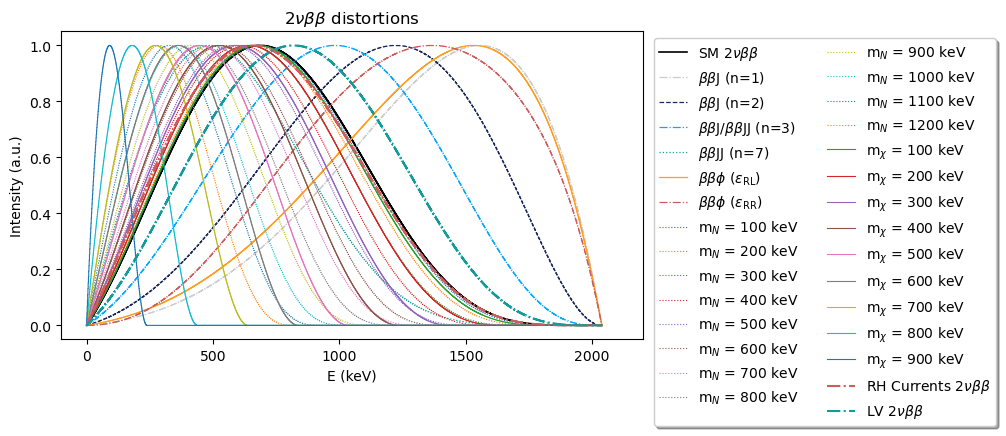

In [15]:
for sdist, sterile_mass_keV in zip(lef_signal_dist, sterile_masses_keV):
    ax.step(bins, sdist/np.max(sdist), label=r'm$_{N}$ = ' + str(sterile_mass_keV) + ' keV', lw=0.8)

    
fig, ax = plt.subplots(figsize=(7.5, 4))
ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k', lw=1.2, ls='-', label=r'SM 2$\nu\beta\beta$')
#ax.fill_between(bins, 0, sm_2nbb_dist/np.max(sm_2nbb_dist), color='teal', alpha=0.2)#, hatch='-')

ax.step(bins, majo_n1_dist/np.max(majo_n1_dist), c=cols[0], lw=0.9, ls='-.', label=r'$\beta\beta$J (n=1)')
ax.step(bins, majo_n2_dist/np.max(majo_n2_dist), c=cols[2], lw=0.9, ls='--', label=r'$\beta\beta$J (n=2)')
ax.step(bins, majo_n3_dist/np.max(majo_n3_dist), c=cols[1], lw=0.9, ls='-.', label=r'$\beta\beta$J/$\beta\beta$JJ (n=3)')
ax.step(bins, majo_n7_dist/np.max(majo_n7_dist), c=cols[4], lw=0.9, ls=':',  label=r'$\beta\beta$JJ (n=7)')
ax.step(bins, majoRL_dist /np.max(majoRL_dist ), c=cols[3], lw=0.9, ls='-',  label=r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RL}}$)')
ax.step(bins, majoRR_dist /np.max(majoRR_dist ), c=cols[5], lw=0.9, ls='-.', label=r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RR}}$)')

for sdist, sterile_mass_keV in zip(lef_signal_dist, sterile_masses_keV):
    ax.step(bins, sdist/np.max(sdist), label=r'm$_{N}$ = ' + str(sterile_mass_keV) + ' keV', lw=0.8, ls=':')
for sdist, fermion_mass_keV in zip(def_signal_dist, light_fermion_masses_keV):
    ax.step(bins, sdist/np.max(sdist), label=r'm$_{\chi}$ = ' + str(fermion_mass_keV) + ' keV', lw=0.8)
    
ax.step(bins, rh_curr_dist / np.max(rh_curr_dist), c=cols[5], ls='-.', label=r'RH Currents 2$\nu\beta\beta$', )
ax.step(bins, lv_dist/np.max(lv_dist), c=cols[4], ls='-.', label=r'LV 2$\nu\beta\beta$')


ax.set_xlim(-100, 2200)
ax.set_xlabel('E (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title(r'2$\nu\beta\beta$ distortions')
ax.legend(loc='upper right', ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(1.62, 1))
#fig.savefig('./images/all_spectra.pdf', bbox_inches='tight')
plt.show()

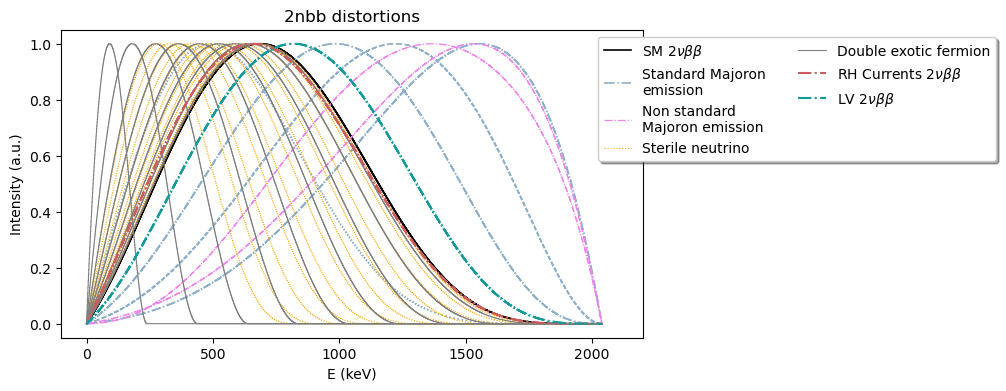

In [16]:
for sdist, sterile_mass_keV in zip(lef_signal_dist, sterile_masses_keV):
    ax.step(bins, sdist/np.max(sdist), label=r'm$_{N}$ = ' + str(sterile_mass_keV) + ' keV', lw=0.8)

    
fig, ax = plt.subplots(figsize=(7.5, 4))
ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k', lw=1.2, ls='-', label=r'SM 2$\nu\beta\beta$')
#ax.fill_between(bins, 0, sm_2nbb_dist/np.max(sm_2nbb_dist), color='teal', alpha=0.2)#, hatch='-')

ax.step(bins, majo_n1_dist/np.max(majo_n1_dist), c='#8FB0CB', lw=1.2, ls='-.', label='Standard Majoron \nemission')
ax.step(bins, majo_n2_dist/np.max(majo_n2_dist), c='#8FB0CB', lw=1.2, ls='--')
ax.step(bins, majo_n3_dist/np.max(majo_n3_dist), c='#8FB0CB', lw=1.2, ls='-.')
ax.step(bins, majo_n7_dist/np.max(majo_n7_dist), c='#8FB0CB', lw=1.2, ls=':')
ax.step(bins, majoRL_dist /np.max(majoRL_dist ), c='violet',  lw=0.9, ls='-.', label='Non standard \nMajoron emission')
ax.step(bins, majoRR_dist /np.max(majoRR_dist ), c='violet',  lw=0.9, ls='-.')

for i, (sdist, sterile_mass_keV) in enumerate(zip(lef_signal_dist, sterile_masses_keV)):
    if i==0:
        ax.step(bins, sdist/np.max(sdist), label='Sterile neutrino', lw=0.8, ls=':', c='orange')
    else:
        ax.step(bins, sdist/np.max(sdist), lw=0.8, ls=':', c='orange')
for i, (sdist, fermion_mass_keV) in enumerate(zip(def_signal_dist, light_fermion_masses_keV)):
    if i==0:
        ax.step(bins, sdist/np.max(sdist), label='Double exotic fermion', lw=0.8, color='grey')
    else:
        ax.step(bins, sdist/np.max(sdist), lw=0.8, color='grey')
    
ax.step(bins, rh_curr_dist / np.max(rh_curr_dist), c=cols[5], ls='-.', label=r'RH Currents 2$\nu\beta\beta$')
ax.step(bins, lv_dist/np.max(lv_dist), c=cols[4], ls='-.', label=r'LV 2$\nu\beta\beta$')


ax.set_xlim(-100, 2200)
ax.set_xlabel('E (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title('2nbb distortions')
ax.legend(loc='upper right', ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(1.62, 1))

plt.show()

## Try to express the distortions in the spectra from the ratio with the SM spectrum

#### Right handed currents

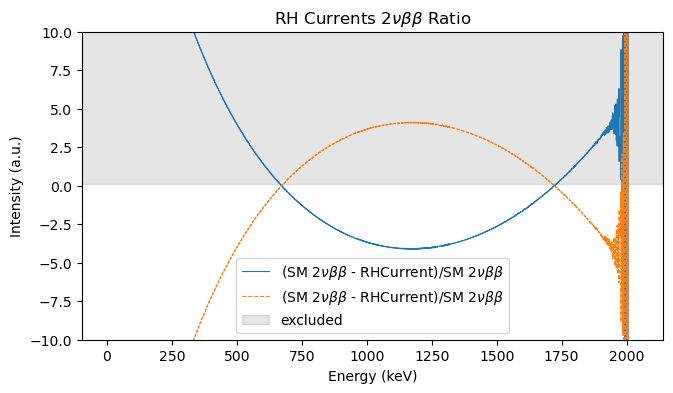

In [44]:
rh_curr_dist      = np.loadtxt(basepath+'dist/rh_curr/Ge-RHC-Etot-distro-1kev-reinterpolated.dat', usecols=(1), unpack=True)
rh_curr_dist      = np.insert(rh_curr_dist, 0, 0, axis=0)
rh_curr_dist      = rh_curr_dist / np.sum(rh_curr_dist)
rh_curr_dist_norm = rh_curr_dist / np.max(rh_curr_dist)

epsilon = 1e-10  # Small value to avoid division by zero
sm_2nbb_dist_norm = sm_2nbb_dist / np.max(sm_2nbb_dist)
sm_2nbb_dist_norm[sm_2nbb_dist_norm == 0] = epsilon  # Replace zero with epsilon

ratio_rh_sm = 100*((rh_curr_dist_norm - sm_2nbb_dist_norm) / sm_2nbb_dist_norm)
ratio_rh_sm2 = -ratio_rh_sm

fig, ax = plt.subplots(figsize=(7.5, 4))
ax.step(bins[5:], ratio_rh_sm[5:], lw=0.8, label=r'(SM 2$\nu\beta\beta$ - RHCurrent)/SM 2$\nu\beta\beta$')
ax.step(bins[5:], ratio_rh_sm2[5:], ls='--', lw=0.8, label=r'(SM 2$\nu\beta\beta$ - RHCurrent)/SM 2$\nu\beta\beta$')
ax.axhspan(0.1, 1000, alpha=0.2, color='grey', label='excluded')
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title(r'RH Currents 2$\nu\beta\beta$ Ratio')
# ax.set_yscale('log')
plt.ylim(-10,10)
ax.legend()
plt.show()